In [1]:
import numpy as np
x_test = np.load('/home/jovyan/Wustl_iiot/x_test.npy')
x_train = np.load('/home/jovyan/Wustl_iiot/x_train.npy')
x_val = np.load('/home/jovyan/Wustl_iiot/x_val.npy')
y_test = np.load('/home/jovyan/Wustl_iiot/y_test.npy')
y_train = np.load('/home/jovyan/Wustl_iiot/y_train.npy')
y_val = np.load('/home/jovyan/Wustl_iiot/y_val.npy')

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
metrics = {
        "model" : '',
        "attack_model" : '',
        "epsilon" : '',
        "Accuracy": '',
        "Precision-micro": '',
        "Precision-macro": '',
        "Precision-weighted": '',
        "F1-micro": '',
        "F1-macro": '',
        "F1-weighted": '',
        "Recall_micro": '',
        "Recall_macro": '',
        "Recall_weighted": '',
        "FPR": '',
        "TPR": '',
        "FNR": '',
        "TNR": '',
        # "AUC": auc
    }
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/Wustl_iiot/transfer_attack/attackmodel.csv", mode='a', index=False)

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printmatrix(x_test_adv, y_test, classifier, model_name, attack_name, epsilon):
    # preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    preds = classifier.predict(x_test_adv)

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    recall_macro = recall_score(y_test_arg, y_hat, average='macro')
    recall_micro = recall_score(y_test_arg, y_hat, average='micro')
    recall_weighted = recall_score(y_test_arg, y_hat, average='weighted')

    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    print(f"Recall(micro,macro,weighted: {recall_micro},{recall_macro},{recall_weighted}")

    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : model_name,
        "attack_model" : attack_name,
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "Recall_micro": recall_micro,
        "Recall_macro": recall_macro,
        "Recall_weighted": recall_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/Wustl_iiot/transfer_attack/attackmodel.csv", mode='a', index=False, header=False)

In [5]:
from joblib import dump, load
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb = xgb.fit(x_train, y_train)

# dump(xgb, "/home/jovyan/Wustl_iiot/pre_train/XGB.joblib")

model = xgb

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.01
FPR: [6.70266557e-05 0.00000000e+00 0.00000000e+00 1.47613926e-04
 9.96724703e-01]
TPR: [0.14285714 0.         0.         0.         1.        ]
FNR: [0.85714286 1.         1.         1.         0.        ]
TNR: [0.99993297 1.         1.         0.99985239 0.0032753 ]
Accuracy: 0.927133899888169
Precision(micro,macro,weighted): 0.927133899888169,0.24001148665324018,0.8597839004357904
F1(micro,macro,weighted: 0.927133899888169,0.22995901496806842,0.892185186430787
Recall(micro,macro,weighted: 0.927133899888169,0.22857142857142856,0.927133899888169
FPR: 0.1993878686438918
tpr: 0.22857142857142856
fnr: 0.7714285714285715
tnr: 0.8006121313561081


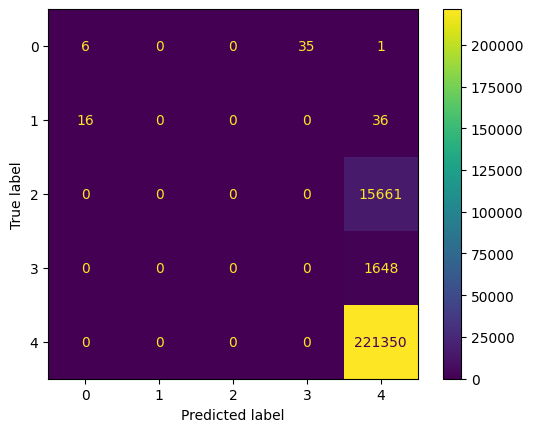

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.1
FPR: [6.70266557e-05 0.00000000e+00 0.00000000e+00 5.90455705e-05
 9.96667241e-01]
TPR: [0.66666667 0.         0.         0.         1.        ]
FNR: [0.33333333 1.         1.         1.         0.        ]
TNR: [0.99993297 1.         1.         0.99994095 0.00333276]
Accuracy: 0.9272260453271791
Precision(micro,macro,weighted): 0.9272260453271791,0.3127395363805846,0.859851470988211
F1(micro,macro,weighted: 0.9272260453271791,0.3226919914558409,0.8922686904877885
Recall(micro,macro,weighted: 0.9272260453271791,0.3333333333333333,0.9272260453271791
FPR: 0.19935866270128602
tpr: 0.3333333333333333
fnr: 0.6666666666666666
tnr: 0.800641337298714


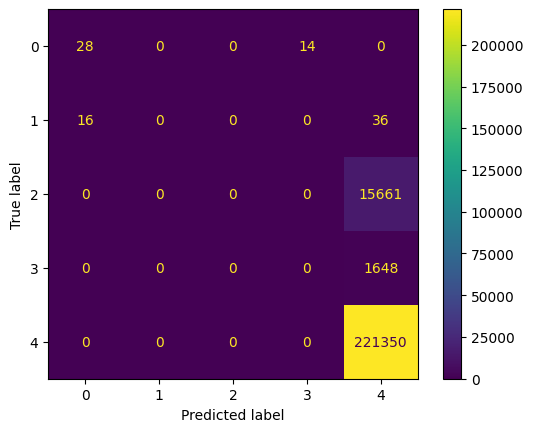

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.2
FPR: [5.44591577e-05 0.00000000e+00 0.00000000e+00 6.74806520e-05
 9.96667241e-01]
TPR: [0.69047619 0.         0.         0.         1.        ]
FNR: [0.30952381 1.         1.         1.         0.        ]
TNR: [0.99994554 1.         1.         0.99993252 0.00333276]
Accuracy: 0.927230233756225
Precision(micro,macro,weighted): 0.927230233756225,0.3235620472030954,0.8598609901451335
F1(micro,macro,weighted: 0.927230233756225,0.3305546714115441,0.8922756062659805
Recall(micro,macro,weighted: 0.927230233756225,0.3380952380952381,0.927230233756225
FPR: 0.19935783621799943
tpr: 0.3380952380952381
fnr: 0.6619047619047619
tnr: 0.8006421637820006


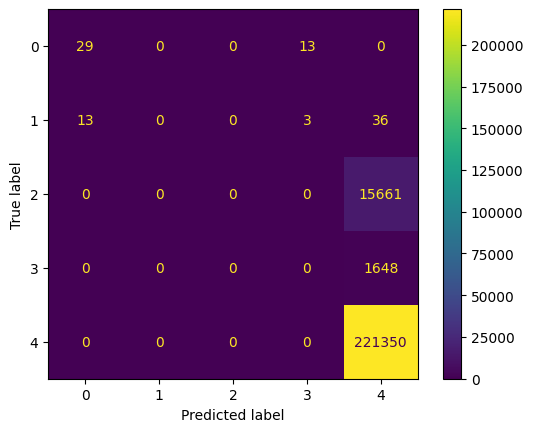

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.3
FPR: [6.70266557e-05 0.00000000e+00 0.00000000e+00 5.90455705e-05
 9.96667241e-01]
TPR: [0.66666667 0.         0.         0.         1.        ]
FNR: [0.33333333 1.         1.         1.         0.        ]
TNR: [0.99993297 1.         1.         0.99994095 0.00333276]
Accuracy: 0.9272260453271791
Precision(micro,macro,weighted): 0.9272260453271791,0.3127395363805846,0.859851470988211
F1(micro,macro,weighted: 0.9272260453271791,0.3226919914558409,0.8922686904877885
Recall(micro,macro,weighted: 0.9272260453271791,0.3333333333333333,0.9272260453271791
FPR: 0.19935866270128602
tpr: 0.3333333333333333
fnr: 0.6666666666666666
tnr: 0.800641337298714


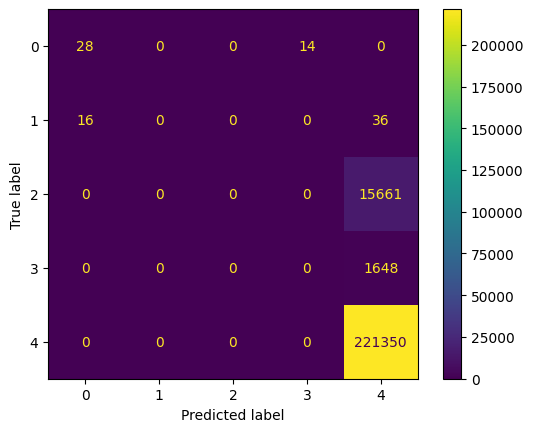

In [6]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Wustl_iiot/transfer_attack/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "FGSM", epsilon)



In [8]:
from art.defences.trainer import Trainer, AdversarialTrainer
from art.estimators.classification import XGBoostClassifier
from art.attacks.evasion import FastGradientMethod

defensemodel = XGBClassifier()
defensemodel.fit(x_train, y_train)
# classifier = XGBoostClassifier(model=model)
# attack = FastGradientMethod(estimator=classifier, eps=0.3)
trainer = Trainer(defensemodel)
trainer.fit(x_train, y_train, nb_epochs=10, batch_size=64)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Wustl_iiot/transfer_attack/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, trainer, "XGB_defense", "FGSM", epsilon)

TypeError: Can't instantiate abstract class Trainer with abstract method fit

In [ ]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Wustl_iiot/transfer_attack/x_test_adv_BIM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "BIM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Wustl_iiot/transfer_attack/x_test_adv_PGD_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "PGD", epsilon)

DF_eps = [0.01, 0.1, 0.2 , 0.3]
for epsilon in DF_eps:
    filename = f'/home/jovyan/Wustl_iiot/transfer_attack/x_test_adv_DF_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "DF", epsilon)